<a href="https://colab.research.google.com/github/IrfanDaffa10/Irfan-Daffayudha-Artificial-Intelegence-/blob/main/Greedy_Best_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path from A to M: ['A', 'C', 'G', 'M']


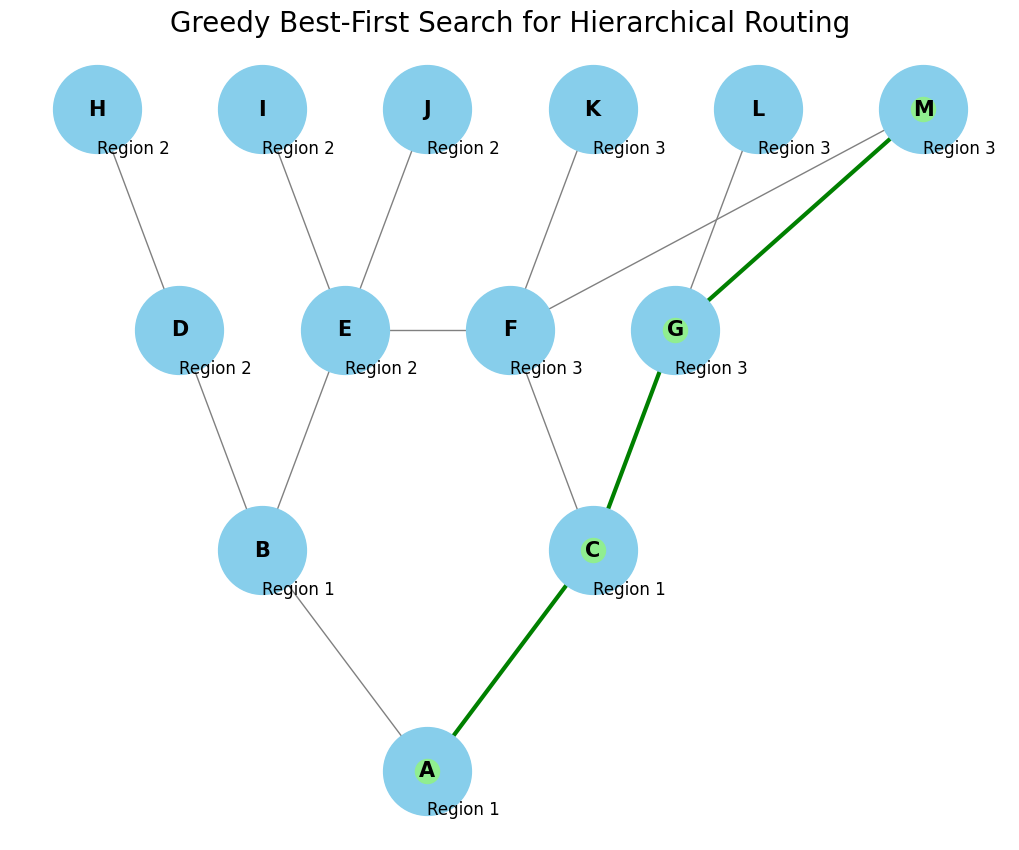

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic

    def __lt__(self, other):
        return self.heuristic < other.heuristic

def greedy_best_first_search_hierarchical(graph, start, goal, heuristic, region_map):
    priority_queue = []  # Priority queue untuk menyimpan node berdasarkan heuristic
    heapq.heappush(priority_queue, Node(start, heuristic[start]))
    visited = set()
    path = {start: None}

    while priority_queue:
        current_node = heapq.heappop(priority_queue).name

        if current_node == goal:
            return reconstruct_path(path, start, goal)

        visited.add(current_node)
        current_region = region_map[current_node]

        # Mengeksplorasi tetangga dalam region yang sama terlebih dahulu
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] == current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

        # Mengeksplorasi tetangga dari region lain
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] != current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

    return None  # Jika tidak ditemukan path

def reconstruct_path(path, start, goal):
    current = goal
    result_path = []
    while current is not None:
        result_path.append(current)
        current = path[current]
    result_path.reverse()
    return result_path

def visualize_graph(graph, path, pos, region_map):
    G = nx.Graph()

    # Menambahkan edges ke dalam graph
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue',
            font_size=15, font_weight='bold', edge_color='gray')

    # Menyorot jalur yang ditemukan
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightgreen')

    # Menampilkan informasi region pada setiap node
    for node, region in region_map.items():
        plt.text(pos[node][0], pos[node][1] - 0.2, f"Region {region}", fontsize=12, color='black')

    plt.title("Greedy Best-First Search for Hierarchical Routing", size=20)
    plt.show()

# Graph dengan hierarchical regions
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['I', 'J'],
    'F': ['K', 'M', 'E'],
    'G': ['L', 'M'],
    'H': [], 'I': [], 'J': [], 'K': [], 'L': [], 'M': []
}

# Nilai heuristic (contoh asumsi)
heuristic = {
    'A': 8, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'F': 5, 'G': 4,
    'H': 3, 'I': 2, 'J': 1, 'K': 3, 'L': 2, 'M': 1
}

# Definisi region untuk hierarchical routing
region_map = {
    'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 3, 'G': 3,
    'H': 2, 'I': 2, 'J': 2, 'K': 3, 'L': 3, 'M': 3
}

# Posisi untuk visualisasi
pos = {
    'A': (0, 0), 'B': (-1, 1), 'C': (1, 1), 'D': (-1.5, 2),
    'E': (-0.5, 2), 'F': (0.5, 2), 'G': (1.5, 2), 'H': (-2, 3),
    'I': (-1, 3), 'J': (0, 3), 'K': (1, 3), 'L': (2, 3), 'M': (3, 3)
}

# Menjalankan pencarian Greedy Best-First Search
start_node = 'A'
goal_node = 'M'
result_path = greedy_best_first_search_hierarchical(graph, start_node, goal_node, heuristic, region_map)
print(f"Path from {start_node} to {goal_node}: {result_path}")

# Visualisasi graph dengan hasil pencarian
visualize_graph(graph, result_path, pos, region_map)


1. Kelas ini merepresentasikan simpul dalam pencarian, dengan properti name (nama simpul) dan heuristic (nilai estimasi jarak ke tujuan).
Operator < (__lt__) digunakan agar simpul dengan heuristik lebih kecil (lebih dekat ke tujuan) memiliki prioritas lebih tinggi dalam antrean.
Fungsi greedy_best_first_search_hierarchical

2. Fungsi ini melakukan pencarian menggunakan Greedy Best-First Search.
Gunakan priority queue (heapq) untuk selalu mengeksplorasi simpul dengan nilai heuristik terendah terlebih dahulu.
Prioritas eksplorasi:
Tetangga dalam region yang sama dieksplorasi lebih dahulu.
Tetangga di region lain baru dieksplorasi jika tidak ada opsi lain.
Jika simpul tujuan ditemukan, jalur dari awal ke tujuan direkonstruksi menggunakan reconstruct_path.
Fungsi reconstruct_path

3. Membangun kembali jalur dari hasil pencarian dengan menelusuri kembali dari tujuan ke awal.
Fungsi visualize_graph

4. Menggunakan networkx dan matplotlib untuk menampilkan graf.
Node dan edge divisualisasikan dengan warna dan ukuran berbeda.
Jalur yang ditemukan ditampilkan dengan warna hijau.
Nama region juga ditampilkan di setiap simpul.

5. Graf & Hierarki Wilayah
Di mana 'A' terhubung ke 'B' dan 'C', 'B' terhubung ke 'D' dan 'E', dst.
Misalnya, 'A', 'B', 'C' ada di region 1, 'D', 'E', 'H', 'I', 'J' ada di region 2, dan seterusnya.

Kesimpulan
Kode ini mengimplementasikan pencarian jalur berbasis Greedy Best-First Search dengan prioritas wilayah.
Pendekatan hierarkis membantu menemukan jalur yang lebih efisien dengan menjelajahi simpul dalam wilayah yang sama terlebih dahulu.
Hasil pencarian divisualisasikan dalam graf agar lebih mudah dipahami.

Path dari A ke M: ['A', 'B', 'E', 'H', 'K', 'M']


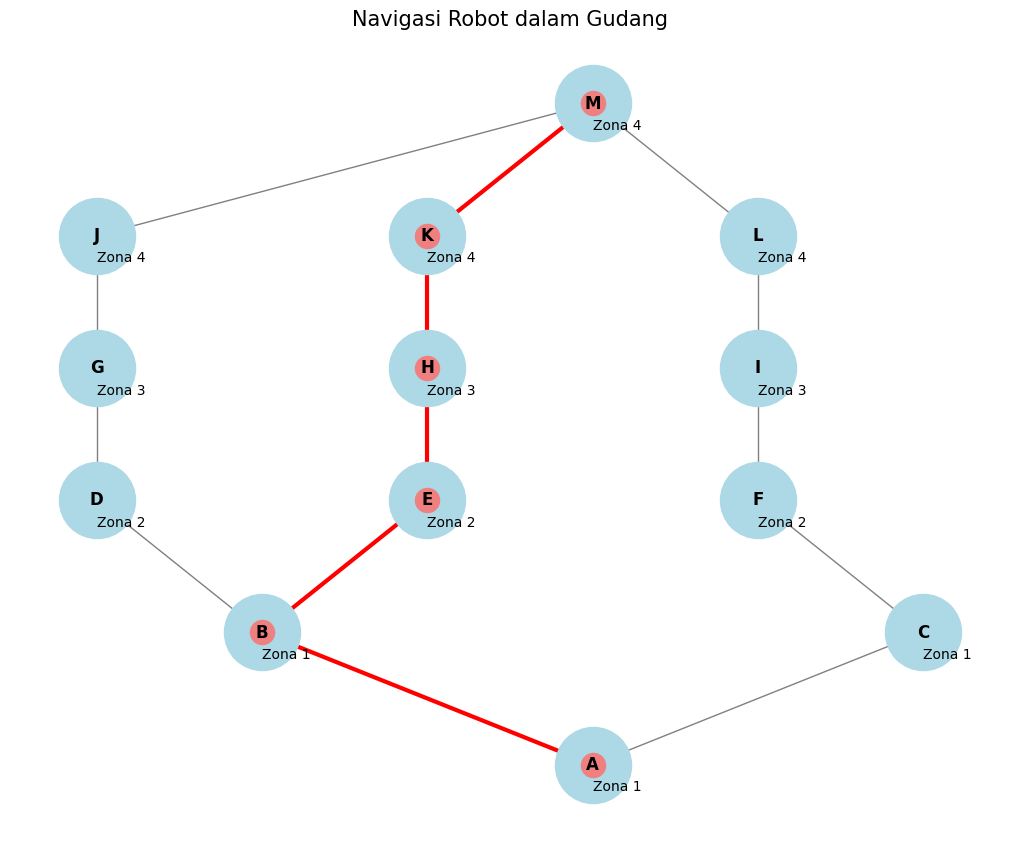

In [3]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic

    def __lt__(self, other):
        return self.heuristic < other.heuristic

def greedy_best_first_search_warehouse(graph, start, goal, heuristic, zone_map):
    priority_queue = []
    heapq.heappush(priority_queue, Node(start, heuristic[start]))
    visited = set()
    path = {start: None}

    while priority_queue:
        current_node = heapq.heappop(priority_queue).name

        if current_node == goal:
            return reconstruct_path(path, start, goal)

        visited.add(current_node)
        current_zone = zone_map[current_node]

        for neighbor in graph[current_node]:
            if neighbor not in visited and zone_map[neighbor] == current_zone:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

        for neighbor in graph[current_node]:
            if neighbor not in visited and zone_map[neighbor] != current_zone:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

    return None

def reconstruct_path(path, start, goal):
    current = goal
    result_path = []
    while current is not None:
        result_path.append(current)
        current = path[current]
    result_path.reverse()
    return result_path

def visualize_warehouse(graph, path, pos, zone_map):
    G = nx.Graph()

    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue',
            font_size=12, font_weight='bold', edge_color='gray')

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightcoral')

    for node, zone in zone_map.items():
        plt.text(pos[node][0], pos[node][1] - 0.2, f"Zona {zone}", fontsize=10, color='black')

    plt.title("Navigasi Robot dalam Gudang", size=15)
    plt.show()

warehouse_graph = {
    'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F'],
    'D': ['G'], 'E': ['H'], 'F': ['I'],
    'G': ['J'], 'H': ['K'], 'I': ['L'],
    'J': ['M'], 'K': ['M'], 'L': ['M'], 'M': []
}

heuristic_values = {
    'A': 10, 'B': 8, 'C': 9, 'D': 7, 'E': 6, 'F': 7, 'G': 5, 'H': 4,
    'I': 5, 'J': 3, 'K': 2, 'L': 3, 'M': 1
}

zone_mapping = {
    'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2, 'G': 3, 'H': 3,
    'I': 3, 'J': 4, 'K': 4, 'L': 4, 'M': 4
}

positions = {
    'A': (0, 0), 'B': (-1, 1), 'C': (1, 1), 'D': (-1.5, 2),
    'E': (-0.5, 2), 'F': (0.5, 2), 'G': (-1.5, 3), 'H': (-0.5, 3),
    'I': (0.5, 3), 'J': (-1.5, 4), 'K': (-0.5, 4), 'L': (0.5, 4), 'M': (0, 5)
}

start_node = 'A'
goal_node = 'M'
result_path = greedy_best_first_search_warehouse(warehouse_graph, start_node, goal_node, heuristic_values, zone_mapping)
print(f"Path dari {start_node} ke {goal_node}: {result_path}")

visualize_warehouse(warehouse_graph, result_path, positions, zone_mapping)
